In [ ]:
import numpy as np
import pandas as pd

In [ ]:
post2025= pd.read_csv('MTA_Bus_Hourly_Ridership__Beginning_2025.csv')

In [ ]:
pre2025=pd.read_csv('MTA_Bus_Hourly_Ridership__2020-2024.csv')

In [ ]:
post2025.head()

,transit_timestamp,bus_route,payment_method,fare_class_category,ridership,transfers
0,01/02/2025 07:00:00 AM,B44+,metrocard,Metrocard - Other,21,2
1,01/02/2025 07:00:00 AM,B44+,omny,Metrocard - Fair Fare,0,0
2,01/02/2025 07:00:00 AM,B44+,omny,Metrocard - Unlimited 30-Day,0,0
3,01/02/2025 07:00:00 AM,B45,omny,OMNY - Full Fare,54,10
4,01/02/2025 07:00:00 AM,B52,metrocard,Metrocard - Fair Fare,31,4


In [ ]:
pre2025.head()

,transit_timestamp,bus_route,payment_method,fare_class_category,ridership,transfers
0,10/23/2024 1:00,M79+,omny,Metrocard - Other,0,0
1,10/23/2024 1:00,M90,metrocard,Metrocard - Seniors & Disability,0,0
2,10/23/2024 1:00,Q07,metrocard,OMNY - Students,0,0
3,10/23/2024 1:00,Q100,metrocard,OMNY - Other,0,0
4,10/23/2024 1:00,Q107,metrocard,OMNY - Students,0,0


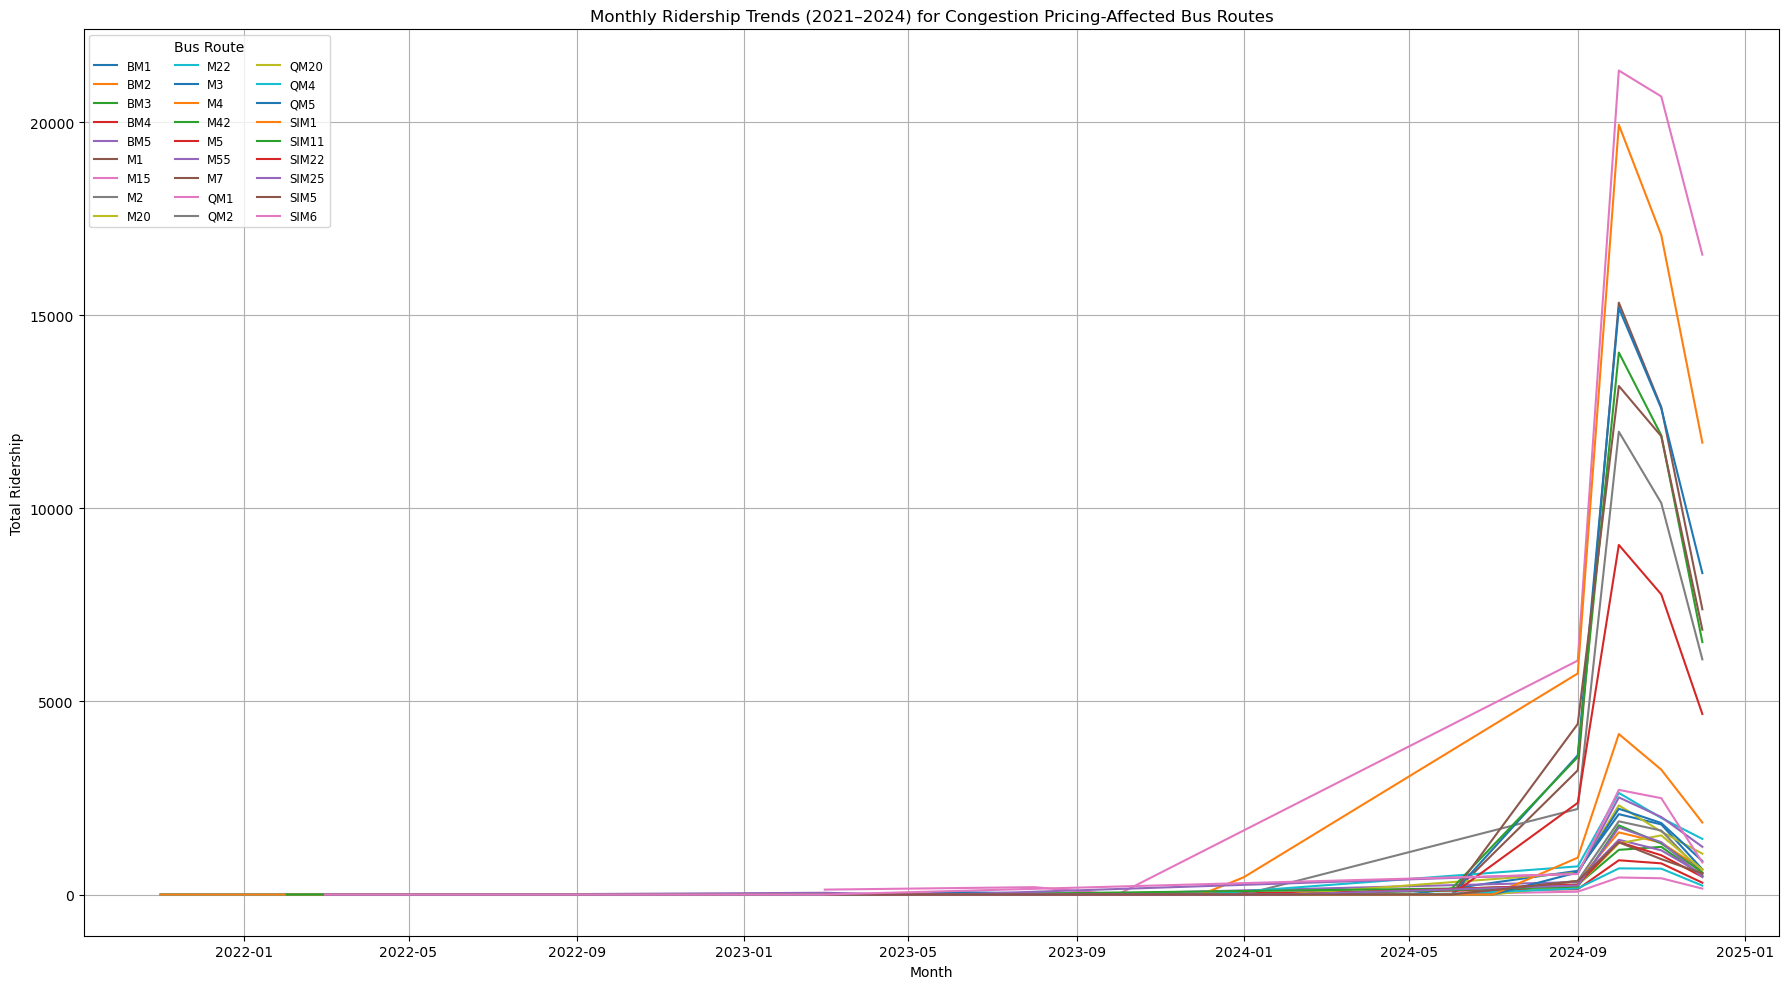

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime format
pre2025['transit_timestamp'] = pd.to_datetime(pre2025['transit_timestamp'], errors='coerce')

# Define target routes (most likely affected by congestion pricing)
target_routes = [
    # Local Manhattan routes
    'M15', 'M5', 'M1', 'M2', 'M3', 'M4', 'M55', 'M7', 'M20', 'M42', 'M34', 'M22',
    # Express routes
    'BxM1', 'BxM2', 'BxM3', 'BxM4', 'BxM11',
    'BM1', 'BM2', 'BM3', 'BM4', 'BM5',
    'QM1', 'QM2', 'QM4', 'QM5', 'QM20',
    'SIM1', 'SIM5', 'SIM6', 'SIM11', 'SIM22', 'SIM25'
]

# Filter for only these routes
filtered_df = pre2025[pre2025['bus_route'].isin(target_routes)].copy()

# Extract month for grouping
filtered_df['Month'] = filtered_df['transit_timestamp'].dt.to_period('M')

# Group by route and month, summing ridership
monthly_ridership = (
    filtered_df.groupby(['bus_route', 'Month'])['ridership']
    .sum()
    .reset_index()
)

# Convert Month to datetime for plotting
monthly_ridership['Month'] = monthly_ridership['Month'].dt.to_timestamp()

# Plotting
plt.figure(figsize=(18, 10))
for route in monthly_ridership['bus_route'].unique():
    data = monthly_ridership[monthly_ridership['bus_route'] == route]
    plt.plot(data['Month'], data['ridership'], label=route)

plt.title("Monthly Ridership Trends (2021–2024) for Congestion Pricing-Affected Bus Routes")
plt.xlabel("Month")
plt.ylabel("Total Ridership")
plt.legend(title="Bus Route", ncol=3, fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


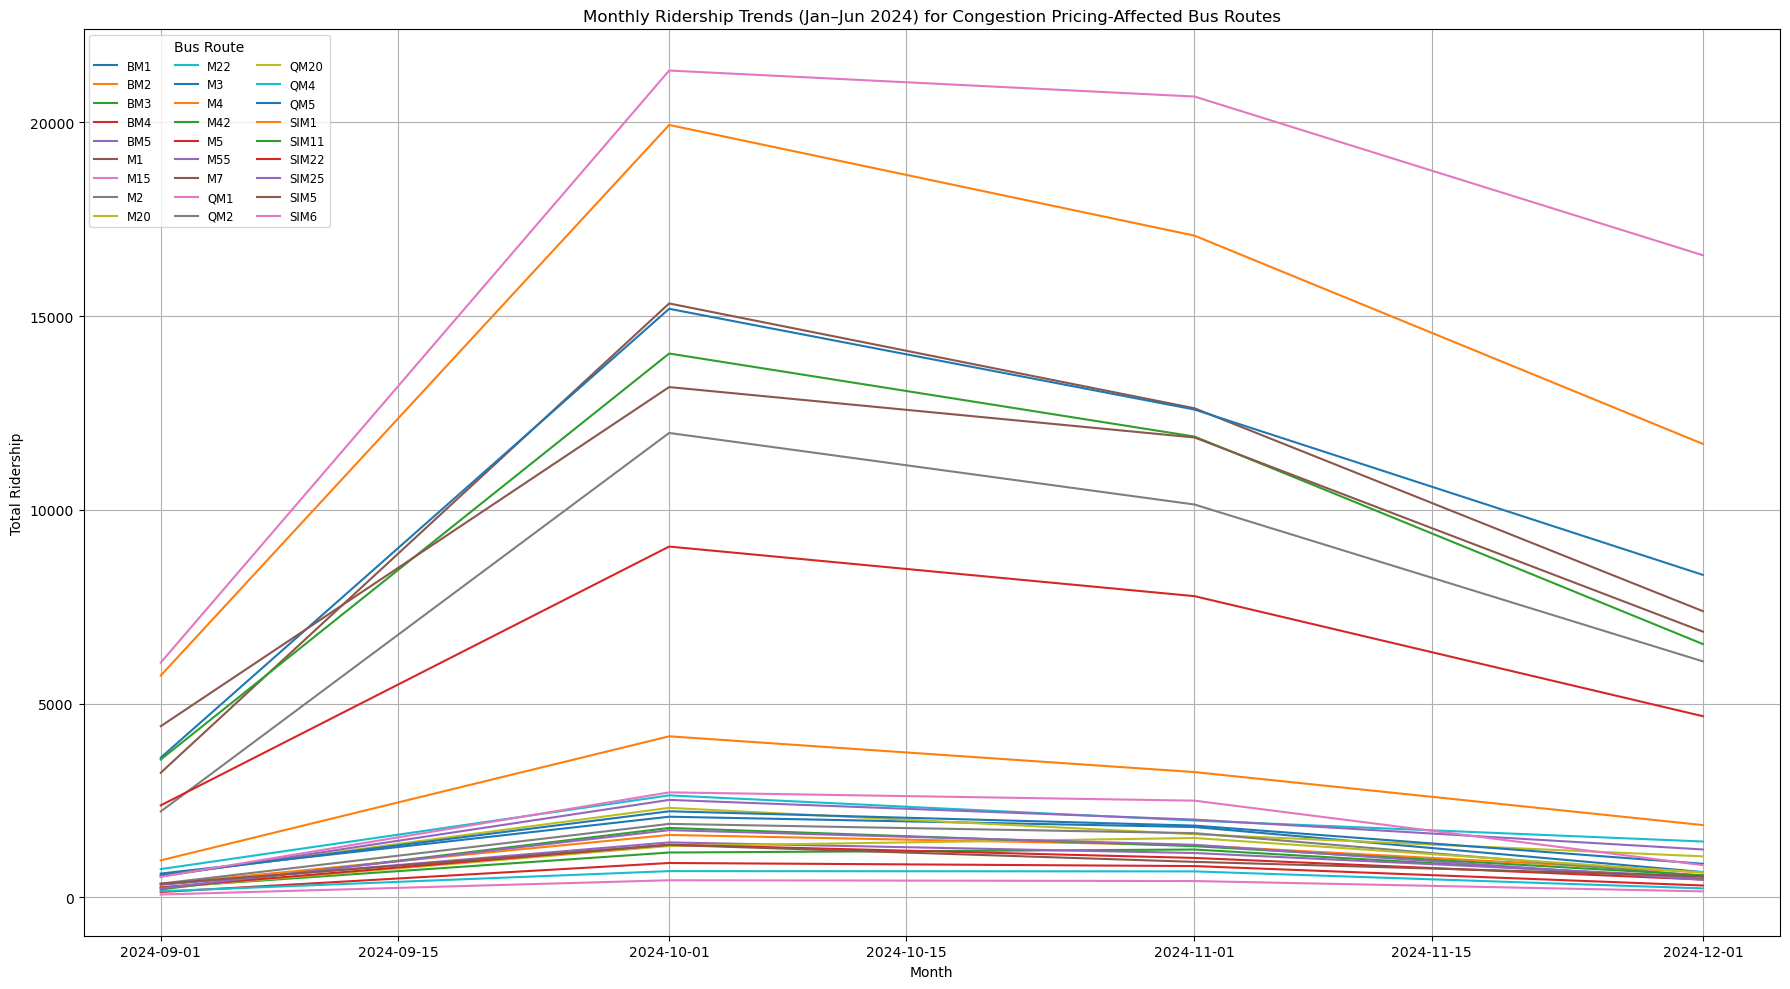

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime format
pre2025['transit_timestamp'] = pd.to_datetime(pre2025['transit_timestamp'], errors='coerce')

# Define target routes (most likely affected by congestion pricing)
target_routes = [
    # Local Manhattan routes
    'M15', 'M5', 'M1', 'M2', 'M3', 'M4', 'M55', 'M7', 'M20', 'M42', 'M34', 'M22',
    # Express routes
    'BxM1', 'BxM2', 'BxM3', 'BxM4', 'BxM11',
    'BM1', 'BM2', 'BM3', 'BM4', 'BM5',
    'QM1', 'QM2', 'QM4', 'QM5', 'QM20',
    'SIM1', 'SIM5', 'SIM6', 'SIM11', 'SIM22', 'SIM25'
]

# Filter for only these routes
filtered_df = pre2025[pre2025['bus_route'].isin(target_routes)].copy()

# Extract month for grouping
filtered_df['Month'] = filtered_df['transit_timestamp'].dt.to_period('M')

# Group by route and month, summing ridership
monthly_ridership = (
    filtered_df.groupby(['bus_route', 'Month'])['ridership']
    .sum()
    .reset_index()
)

# Convert Month to datetime for plotting
monthly_ridership['Month'] = monthly_ridership['Month'].dt.to_timestamp()

# Filter for just Jan–June 2024
start_date = pd.to_datetime("2024-09-01")
end_date = pd.to_datetime("2024-12-31")
monthly_ridership = monthly_ridership[
    (monthly_ridership['Month'] >= start_date) &
    (monthly_ridership['Month'] <= end_date)
]

# Plotting
plt.figure(figsize=(18, 10))
for route in monthly_ridership['bus_route'].unique():
    data = monthly_ridership[monthly_ridership['bus_route'] == route]
    plt.plot(data['Month'], data['ridership'], label=route)

plt.title("Monthly Ridership Trends (Jan–Jun 2024) for Congestion Pricing-Affected Bus Routes")
plt.xlabel("Month")
plt.ylabel("Total Ridership")
plt.legend(title="Bus Route", ncol=3, fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


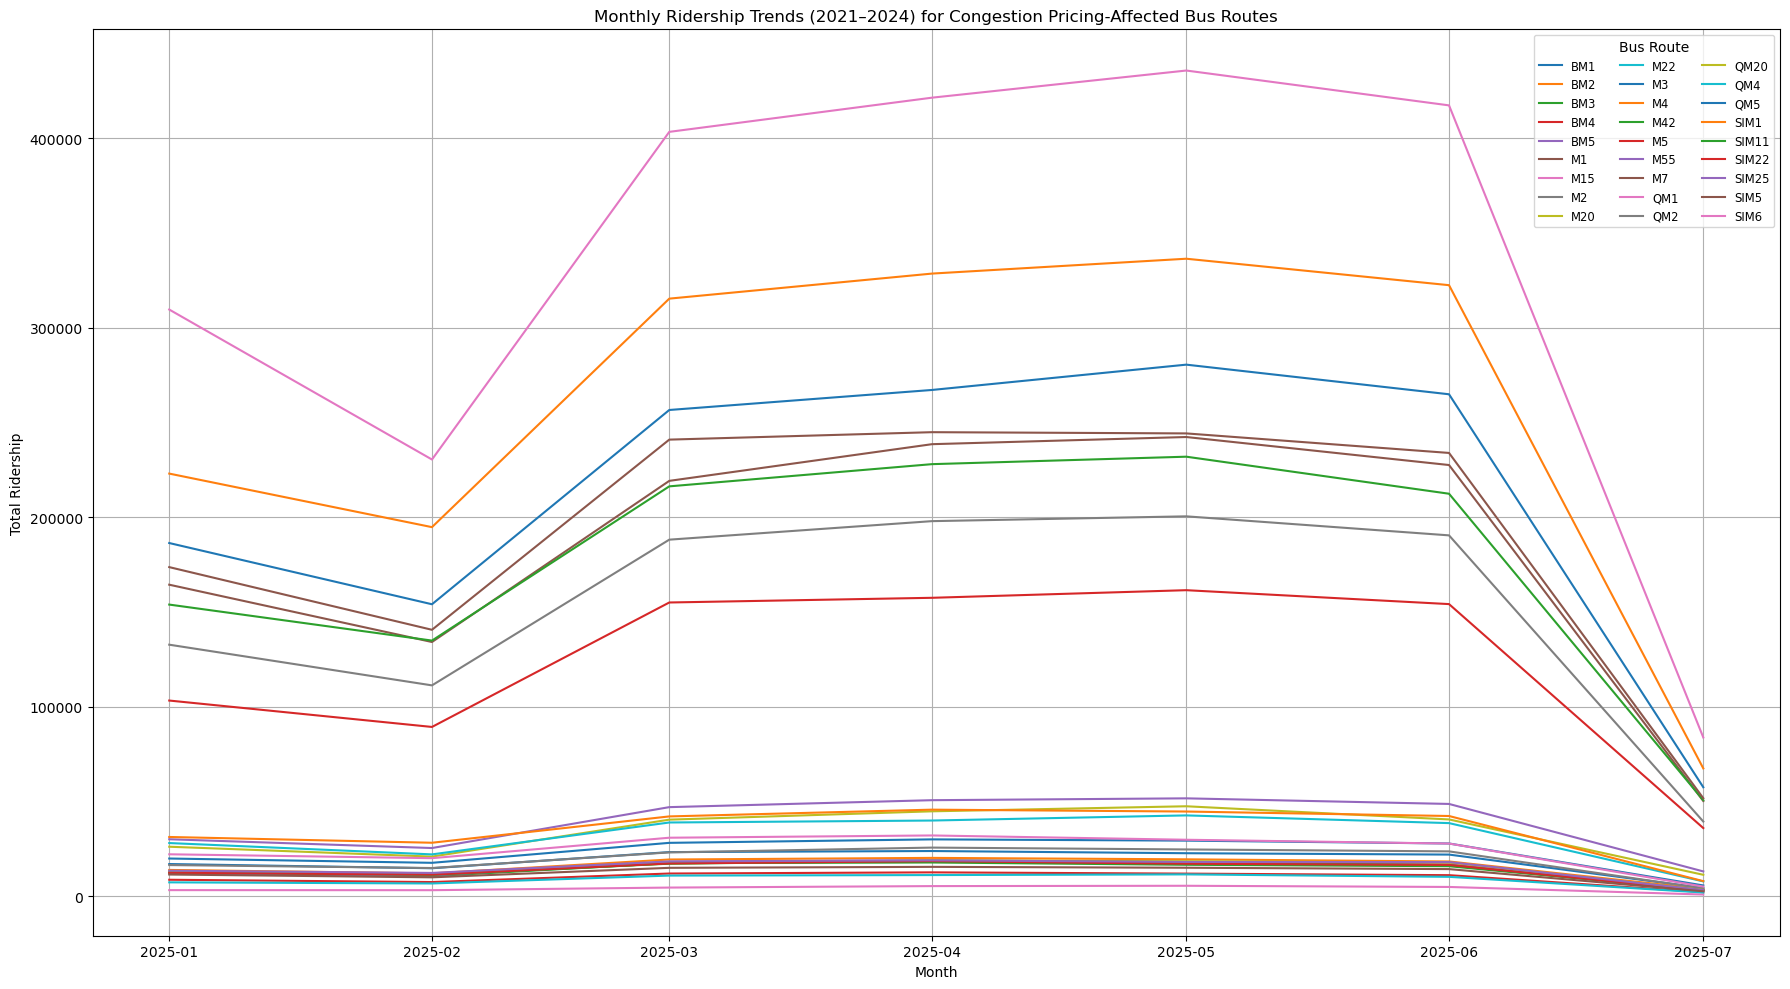

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime format
post2025['transit_timestamp'] = pd.to_datetime(post2025['transit_timestamp'], errors='coerce')

# Define target routes (most likely affected by congestion pricing)
target_routes = [
    # Local Manhattan routes
    'M15', 'M5', 'M1', 'M2', 'M3', 'M4', 'M55', 'M7', 'M20', 'M42', 'M34', 'M22',
    # Express routes
    'BxM1', 'BxM2', 'BxM3', 'BxM4', 'BxM11',
    'BM1', 'BM2', 'BM3', 'BM4', 'BM5',
    'QM1', 'QM2', 'QM4', 'QM5', 'QM20',
    'SIM1', 'SIM5', 'SIM6', 'SIM11', 'SIM22', 'SIM25'
]

# Filter for only these routes
filtered_df = post2025[post2025['bus_route'].isin(target_routes)].copy()

# Extract month for grouping
filtered_df['Month'] = filtered_df['transit_timestamp'].dt.to_period('M')

# Group by route and month, summing ridership
monthly_ridership = (
    filtered_df.groupby(['bus_route', 'Month'])['ridership']
    .sum()
    .reset_index()
)

# Convert Month to datetime for plotting
monthly_ridership['Month'] = monthly_ridership['Month'].dt.to_timestamp()

# Plotting
plt.figure(figsize=(18, 10))
for route in monthly_ridership['bus_route'].unique():
    data = monthly_ridership[monthly_ridership['bus_route'] == route]
    plt.plot(data['Month'], data['ridership'], label=route)

plt.title("Monthly Ridership Trends (2025) for Congestion Pricing-Affected Bus Routes")
plt.xlabel("Month")
plt.ylabel("Total Ridership")
plt.legend(title="Bus Route", ncol=3, fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


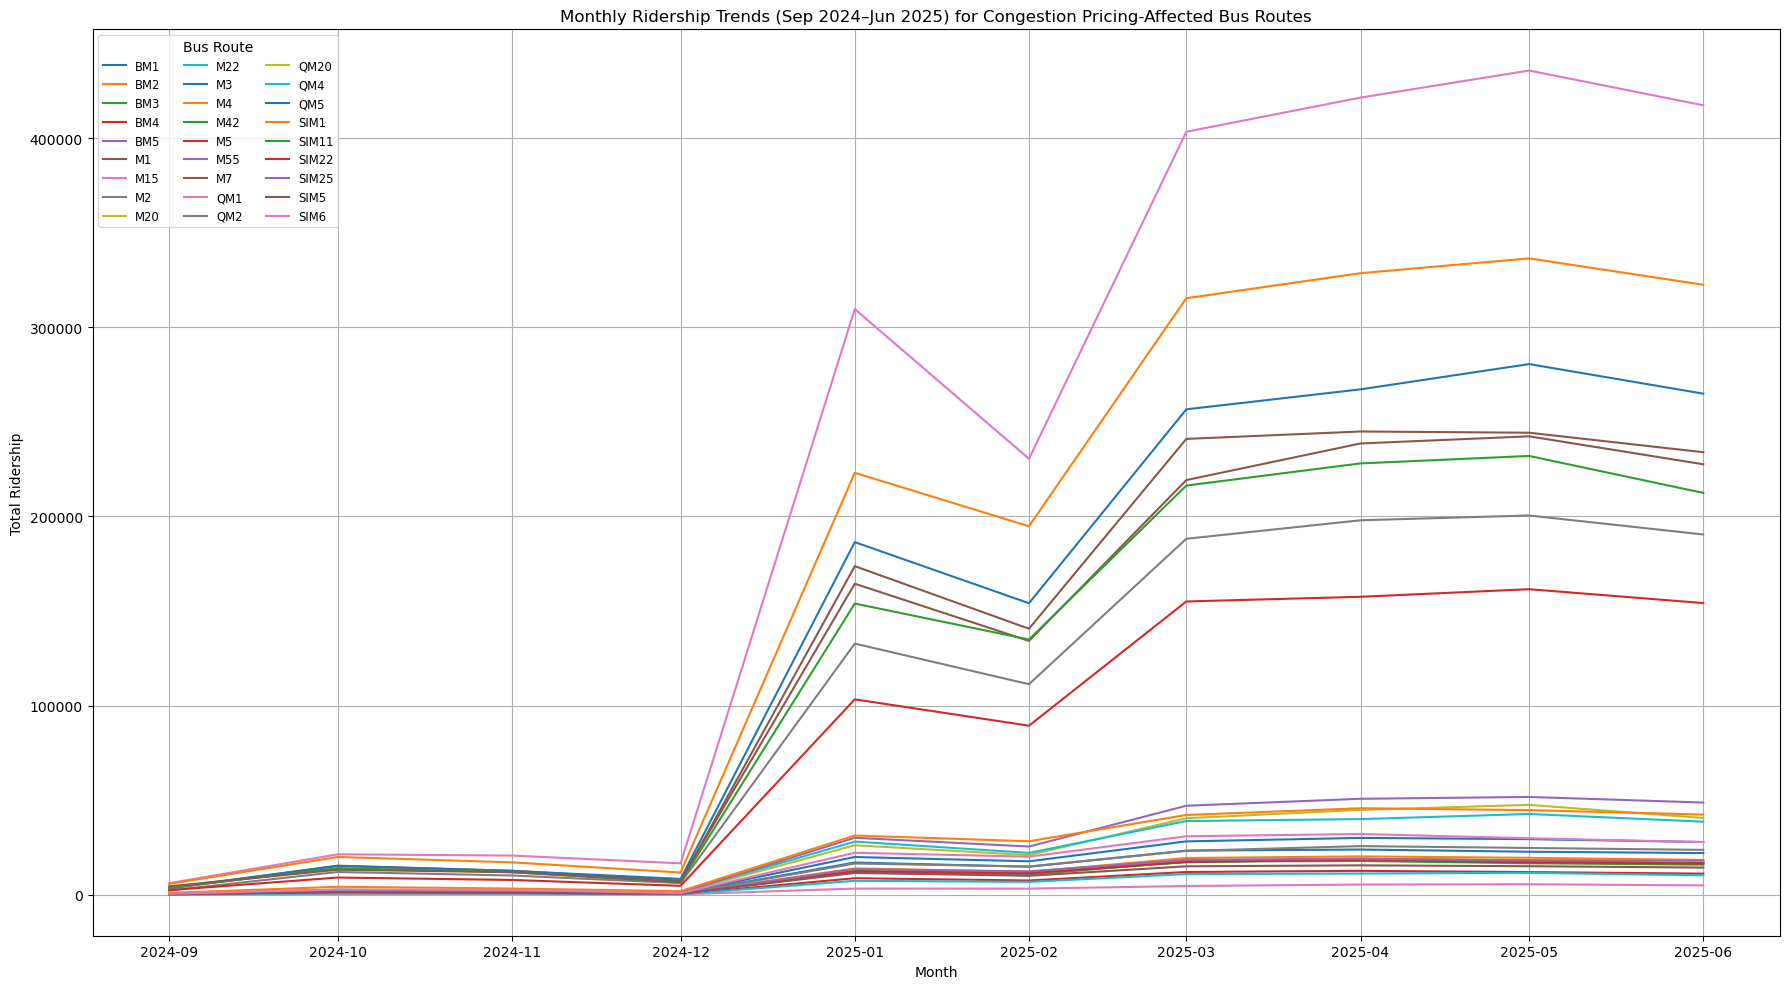

In [ ]:
#Datetime format
pre2025['transit_timestamp'] = pd.to_datetime(pre2025['transit_timestamp'], errors='coerce')
post2025['transit_timestamp'] = pd.to_datetime(post2025['transit_timestamp'], errors='coerce')

# Define target routes
target_routes = [
    'M15', 'M5', 'M1', 'M2', 'M3', 'M4', 'M55', 'M7', 'M20', 'M42', 'M34', 'M22',
    'BxM1', 'BxM2', 'BxM3', 'BxM4', 'BxM11',
    'BM1', 'BM2', 'BM3', 'BM4', 'BM5',
    'QM1', 'QM2', 'QM4', 'QM5', 'QM20',
    'SIM1', 'SIM5', 'SIM6', 'SIM11', 'SIM22', 'SIM25'
]

# Filter and label the datasets
pre_filtered = pre2025[pre2025['bus_route'].isin(target_routes)].copy()
post_filtered = post2025[post2025['bus_route'].isin(target_routes)].copy()

# Extract month and label periods
pre_filtered['Month'] = pre_filtered['transit_timestamp'].dt.to_period('M')
post_filtered['Month'] = post_filtered['transit_timestamp'].dt.to_period('M')

# Combine datasets
combined = pd.concat([pre_filtered, post_filtered], ignore_index=True)

# Convert month to timestamp
combined['Month'] = combined['Month'].dt.to_timestamp()

# Ensure ridership is numeric
combined['ridership'] = pd.to_numeric(combined['ridership'], errors='coerce')

# Group by route and month
monthly_ridership = (
    combined.groupby(['bus_route', 'Month'])['ridership']
    .sum()
    .reset_index()
)

# OPTIONAL: Limit to desired date range (e.g., Sep 2024 – June 2025)
start_date = pd.to_datetime("2024-09-01")
end_date = pd.to_datetime("2025-06-30")
monthly_ridership = monthly_ridership[
    (monthly_ridership['Month'] >= start_date) &
    (monthly_ridership['Month'] <= end_date)
]

# Plot
plt.figure(figsize=(18, 10))
for route in monthly_ridership['bus_route'].unique():
    data = monthly_ridership[monthly_ridership['bus_route'] == route]
    plt.plot(data['Month'], data['ridership'], label=route)

plt.title("Monthly Ridership Trends (Sep 2024–Jun 2025) for Congestion Pricing-Affected Bus Routes")
plt.xlabel("Month")
plt.ylabel("Total Ridership")
plt.legend(title="Bus Route", ncol=3, fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


In [2]:
# run once on your PC
import pandas as pd, glob, pathlib, pickle

monthly_frames = []
for f in glob.glob("MTA_Bus_Hourly_Ridership_*.csv"):
    usecols = ["transit_timestamp", "bus_route", "ridership"]
    for chunk in pd.read_csv(f, usecols=usecols, chunksize=500_000):
        chunk["transit_timestamp"] = pd.to_datetime(chunk["transit_timestamp"], errors="coerce")
        chunk = chunk.dropna()
        chunk["Year"]  = chunk["transit_timestamp"].dt.year
        chunk["Month"] = chunk["transit_timestamp"].dt.month
        m = (
            chunk.groupby(["bus_route", "Year", "Month"], as_index=False)["ridership"]
            .sum()
            .rename(columns={"ridership": "Ridership"})
        )
        monthly_frames.append(m)

bus_monthly = pd.concat(monthly_frames).groupby(["bus_route","Year","Month"],as_index=False).sum()
bus_monthly.to_parquet("bus_monthly.parquet", compression="zstd")
print("Size:", pathlib.Path("bus_monthly.parquet").stat().st_size/1_048_576, "MB")

C:\Users\erenk\AppData\Local\Temp\ipykernel_39808\20878119.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chunk["transit_timestamp"] = pd.to_datetime(chunk["transit_timestamp"], errors="coerce")
C:\Users\erenk\AppData\Local\Temp\ipykernel_39808\20878119.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chunk["transit_timestamp"] = pd.to_datetime(chunk["transit_timestamp"], errors="coerce")
C:\Users\erenk\AppData\Local\Temp\ipykernel_39808\20878119.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chunk["transit_timestamp"] = pd.to_datetime(chunk["transit_timestamp"

Size: 0.0923299789428711 MB


In [ ]:
# run once on your PC
import pandas as pd, glob, pathlib, pickle

monthly_frames = []
for f in glob.glob("MTA_Bus_Hourly_Ridership_*.csv"):
    usecols = ["transit_timestamp", "bus_route", "ridership"]
    for chunk in pd.read_csv(f, usecols=usecols, chunksize=500_000):
        chunk["transit_timestamp"] = pd.to_datetime(chunk["transit_timestamp"], errors="coerce")
        chunk = chunk.dropna()
        chunk["Year"]  = chunk["transit_timestamp"].dt.year
        chunk["Month"] = chunk["transit_timestamp"].dt.month
        m = (
            chunk.groupby(["bus_route", "Year", "Month"], as_index=False)["ridership"]
            .sum()
            .rename(columns={"ridership": "Ridership"})
        )
        monthly_frames.append(m)

bus_monthly = pd.concat(monthly_frames).groupby(["bus_route","Year","Month"],as_index=False).sum()
bus_monthly.to_parquet("bus_monthly.parquet", compression="zstd")
print("Size:", pathlib.Path("bus_monthly.parquet").stat().st_size/1_048_576, "MB")

C:\Users\erenk\AppData\Local\Temp\ipykernel_39808\20878119.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chunk["transit_timestamp"] = pd.to_datetime(chunk["transit_timestamp"], errors="coerce")
C:\Users\erenk\AppData\Local\Temp\ipykernel_39808\20878119.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chunk["transit_timestamp"] = pd.to_datetime(chunk["transit_timestamp"], errors="coerce")
C:\Users\erenk\AppData\Local\Temp\ipykernel_39808\20878119.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chunk["transit_timestamp"] = pd.to_datetime(chunk["transit_timestamp"